##  Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\User\\OneDrive - Strathmore University\\YEAR 2\\jobs_data.csv')

In [3]:
df

,Job Title,Unnamed: 1,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,NaN,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Finance & OPS - Technical Consultant (dynamic...,NaN,2 - 7 yrs,microsoft dynamics ax| strategy implementatio...,System Design/Implementation/ERP/CRM,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",ERP Consultant,77.590082,12.976794,4922
496,Business Development Manager-digital / Export,NaN,5 - 8 yrs,digital marketing| international sales| inter...,Institutional Sales,Noida,"Sales , Retail , Business Development","Internet, Ecommerce",Sales/Business Development Manager,77.327107,28.570784,5866
497,Sr. Software Engineer,NaN,4 - 9 yrs,Unix| PDF| Deployment| Informatica| Oracle| T...,Programming & Design,Hyderabad,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,78.474061,17.360589,1515
498,Website Designer,NaN,0 - 2 yrs,jQuery| Analytical| Wordpress| Conceptualizat...,Creative,Gurgaon,"Design , Creative , User Experience","IT-Software, Software Services",Web Designer,77.002700,28.428262,1946


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Unnamed: 1               0 non-null      float64
 2   Job Experience Required  500 non-null    object 
 3   Key Skills               500 non-null    object 
 4   Role Category            463 non-null    object 
 5   Location                 489 non-null    object 
 6   Functional Area          489 non-null    object 
 7   Industry                 489 non-null    object 
 8   Role                     486 non-null    object 
 9   Longitude                473 non-null    float64
 10  Latitude                 473 non-null    float64
 11  sal                      500 non-null    int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 47.0+ KB


In [5]:
df.head()

,Job Title,Unnamed: 1,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,NaN,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


## Data Cleanup 

In [6]:
# Drop the "Longitude" and "Latitude" columns
df = df.drop(['Unnamed: 1','Longitude', 'Latitude'], axis=1)

           

In [7]:
df.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,sal
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,3855
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,2639
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,2156
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,4059
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,5347


In [8]:
df.isnull().sum()

Job Title                  11
Job Experience Required     0
Key Skills                  0
Role Category              37
Location                   11
Functional Area            11
Industry                   11
Role                       14
sal                         0
dtype: int64

In [9]:

df['Job Experience Required'].unique()

array(['5 - 10 yrs', '2 - 5 yrs', '0 - 1 yrs', '0 - 5 yrs', '5 - 7 yrs',
       '0 - 0 yrs', '9 - 14 yrs', '2 - 7 yrs', '1 - 5 yrs', '1 - 6 yrs',
       ' 3 - 7 Years', '2 - 4 yrs', '3 - 7 yrs', '0 - 3 yrs', '0 - 4 yrs',
       '6 - 8 yrs', '4 - 9 yrs', '3 - 5 yrs', '7 - 12 yrs', '8 - 10 yrs',
       '3 - 6 yrs', '2 - 3 yrs', '15 - 20 yrs', '10 - 16 yrs',
       ' 2 - 7 Years', '1 - 4 yrs', '10 - 15 yrs', '5 - 8 yrs',
       '8 - 13 yrs', '3 - 8 yrs', '6 - 10 yrs', '1 - 3 yrs',
       '11 - 15 yrs', 'vide', '0 - 2 yrs', '1 - 2 yrs', '3 - 4 yrs',
       '6 - 11 yrs', '4 - 8 yrs', '4 - 7 yrs', '2 - 6 yrs', '12 - 22 yrs',
       '8 - 12 yrs', '15 - 22 yrs', ' 1 - 3 Years', 'Not Mentioned',
       '10 - 12 yrs', ' 5 - 7 Years', '4 - 5 yrs', ' 5 - 10 Years',
       '10 - 14 yrs', '4 - 6 yrs', ' 2 - 4 Years', ' 4 - 9 Years',
       '12 - 17 yrs', '6 - 7 yrs', ' 13 - 15 Years', ' 2 - 5 Years',
       '7 - 8 yrs', '7 - 10 yrs', '10 - 20 yrs', ' 4 - 6 Years',
       '12 - 18 yrs', ' 6 - 11 Year

In [10]:
df['Job Experience Required']=df['Job Experience Required'].replace('nan',0)
df['Job Experience Required']=df['Job Experience Required'].replace('vide',0)
df['Job Experience Required']=df['Job Experience Required'].replace('Not Mentioned',0)

In [11]:
df['Job Experience Required'].unique()



array(['5 - 10 yrs', '2 - 5 yrs', '0 - 1 yrs', '0 - 5 yrs', '5 - 7 yrs',
       '0 - 0 yrs', '9 - 14 yrs', '2 - 7 yrs', '1 - 5 yrs', '1 - 6 yrs',
       ' 3 - 7 Years', '2 - 4 yrs', '3 - 7 yrs', '0 - 3 yrs', '0 - 4 yrs',
       '6 - 8 yrs', '4 - 9 yrs', '3 - 5 yrs', '7 - 12 yrs', '8 - 10 yrs',
       '3 - 6 yrs', '2 - 3 yrs', '15 - 20 yrs', '10 - 16 yrs',
       ' 2 - 7 Years', '1 - 4 yrs', '10 - 15 yrs', '5 - 8 yrs',
       '8 - 13 yrs', '3 - 8 yrs', '6 - 10 yrs', '1 - 3 yrs',
       '11 - 15 yrs', 0, '0 - 2 yrs', '1 - 2 yrs', '3 - 4 yrs',
       '6 - 11 yrs', '4 - 8 yrs', '4 - 7 yrs', '2 - 6 yrs', '12 - 22 yrs',
       '8 - 12 yrs', '15 - 22 yrs', ' 1 - 3 Years', '10 - 12 yrs',
       ' 5 - 7 Years', '4 - 5 yrs', ' 5 - 10 Years', '10 - 14 yrs',
       '4 - 6 yrs', ' 2 - 4 Years', ' 4 - 9 Years', '12 - 17 yrs',
       '6 - 7 yrs', ' 13 - 15 Years', ' 2 - 5 Years', '7 - 8 yrs',
       '7 - 10 yrs', '10 - 20 yrs', ' 4 - 6 Years', '12 - 18 yrs',
       ' 6 - 11 Years', ' 3 - 8 Years', ' 

In [12]:

df['Job Experience Required'].isnull().sum()

0

In [13]:
df['Key Skills'].unique()


array([' Media Planning| Digital Media',
       ' pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology',
       ' Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive',
       ' Technical Support',
       ' manual testing| test engineering| test cases| web testing| web technologies',
       ' adobe experience manager| digital| digital marketing| adobe analytics| data analytics| aem| adobe| sitecatalyst',
       ' channel partners| real estate| negotiation| property| Residential Sales',
       ' TFS| Azure| Git| VSTS| Docker| DynaTrace| Splunk| AWS', ' Bde',
       ' technical support| support services| application support| communication skills| voice based process| semi voice| semi voice process',
       ' secretary| executive assistant| ea',
       ' website| web analytics| xml| link building| g

## Below is to convert years of experience into a numerical value for analysis and modelling

In [14]:


import regex as re
import warnings
warnings.filterwarnings('ignore')
experience_required = []
numbers_list = []
def experience_required_func(df) :

    for i in df['Job Experience Required'] :
        if type(i) == str : 
            if re.search(r'\d+',i) : 
                numbers = re.findall(r'\d+',i)
                numbers_list.append(numbers)

        else : 
            numbers_list.append([0])
                
    for number in numbers_list :
        
        if len(number) != 1 :  
            first_num = int(number[0])
            second_num = int(number[1])
            sub = second_num - first_num
        
            experience_required.append(abs(sub)) 

        else : 
            experience_required.append(0)  
    
    return experience_required
experience_required = experience_required_func(df)

In [15]:
df_visualization=df.copy()





In [16]:
df_visualization['experience']=experience_required



In [17]:
df_visualization.tail()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,sal,experience
495,Finance & OPS - Technical Consultant (dynamic...,2 - 7 yrs,microsoft dynamics ax| strategy implementatio...,System Design/Implementation/ERP/CRM,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",ERP Consultant,4922,5
496,Business Development Manager-digital / Export,5 - 8 yrs,digital marketing| international sales| inter...,Institutional Sales,Noida,"Sales , Retail , Business Development","Internet, Ecommerce",Sales/Business Development Manager,5866,3
497,Sr. Software Engineer,4 - 9 yrs,Unix| PDF| Deployment| Informatica| Oracle| T...,Programming & Design,Hyderabad,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,1515,5
498,Website Designer,0 - 2 yrs,jQuery| Analytical| Wordpress| Conceptualizat...,Creative,Gurgaon,"Design , Creative , User Experience","IT-Software, Software Services",Web Designer,1946,2
499,Tech caller hiring a huge number of Executives.,2 - 5 yrs,Outbound| Night shift| Recruitment| iPhone| E...,Voice,Kolkata,"ITES , BPO , KPO , LPO , Customer Service , Op...","IT-Software, Software Services",Associate/Senior Associate -(NonTechnical),1511,3


In [18]:
df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                489 non-null    object
 1   Job Experience Required  500 non-null    object
 2   Key Skills               500 non-null    object
 3   Role Category            463 non-null    object
 4   Location                 489 non-null    object
 5   Functional Area          489 non-null    object
 6   Industry                 489 non-null    object
 7   Role                     486 non-null    object
 8   sal                      500 non-null    int64 
 9   experience               500 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 39.2+ KB


## Exploratory Data Analysis

<AxesSubplot:ylabel='Job Title'>

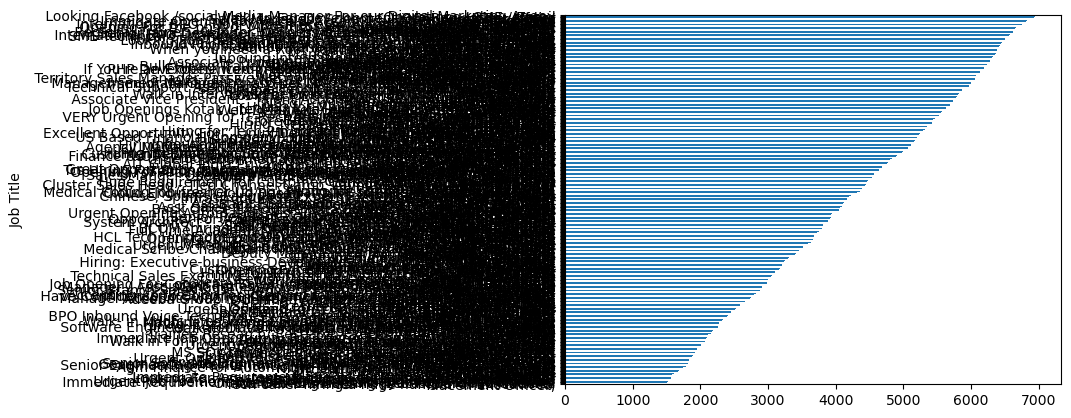

In [19]:
# Salary by job title 
df.groupby('Job Title')['sal'].median().sort_values().plot(kind='barh')

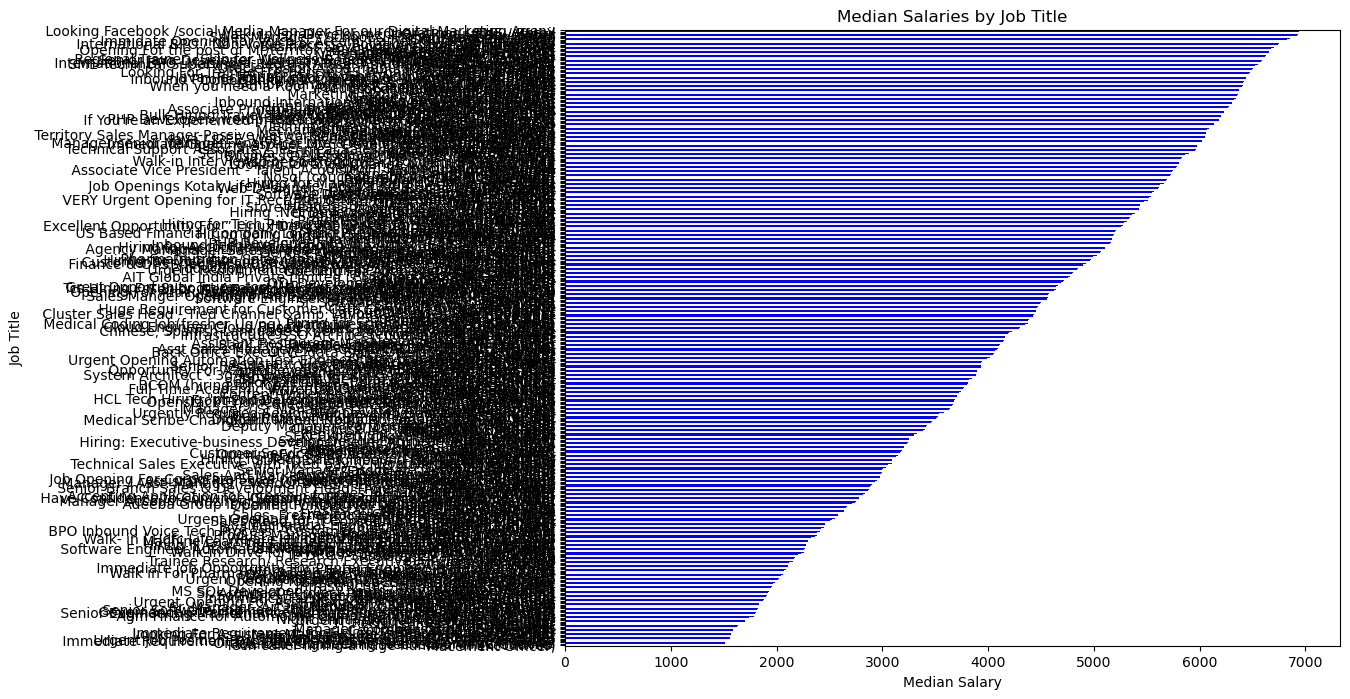

In [20]:
# Group by job title and calculate the median salary
median_salaries = df.groupby('Job Title')['sal'].median().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
median_salaries.plot(kind='barh', color='blue')
plt.xlabel('Median Salary')
plt.ylabel('Job Title')
plt.title('Median Salaries by Job Title')
plt.show()


<AxesSubplot:ylabel='Location'>

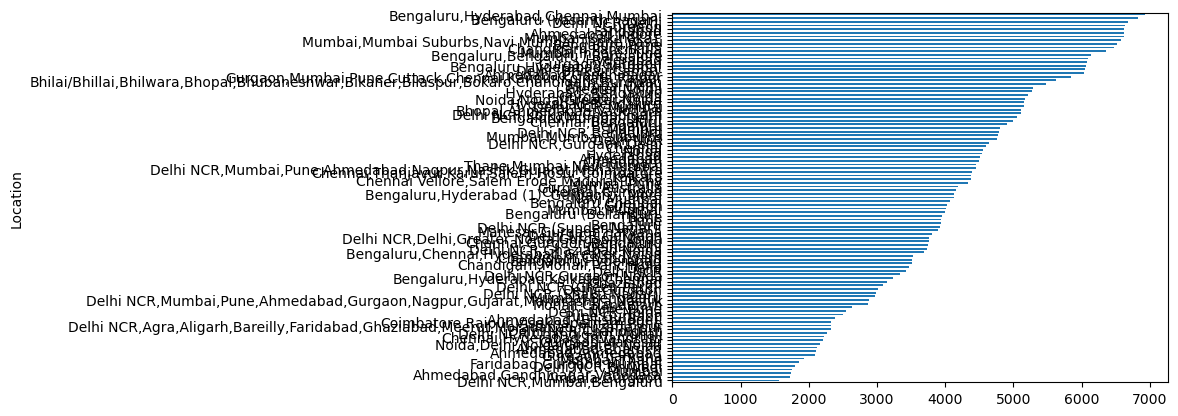

In [21]:
# Salary by location
df.groupby('Location')['sal'].median().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='Industry'>

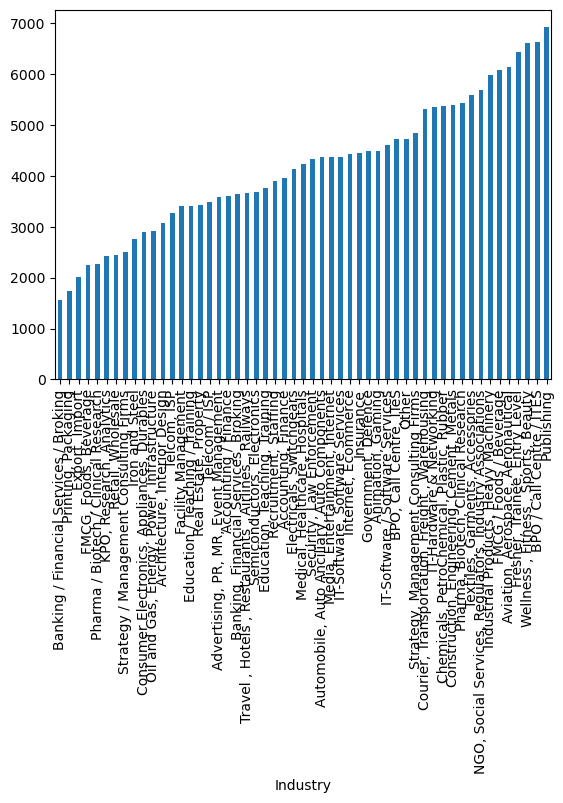

In [22]:
# Salary by industry
df.groupby('Industry')['sal'].median().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='experience', ylabel='sal'>

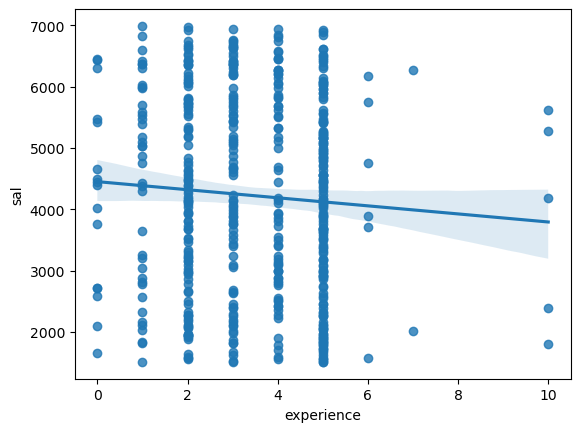

In [23]:

# Salary by experience
sns.regplot(x=df_visualization['experience'], y=df['sal'])

<AxesSubplot:>

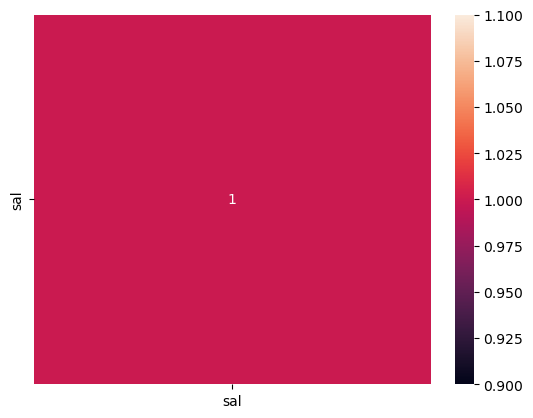

In [24]:
# Correlation matrix
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True)

### Modelling

In [25]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Select columns 
X = df[['Job Title', 'Location', 'Industry', 'Job Experience Required']]
y = df['sal']

# Encode categorical variables
X = pd.get_dummies(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 















In [26]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)



Linear regression score: -1.1026724035211188e+25
Random forest score: -0.3128021264450782


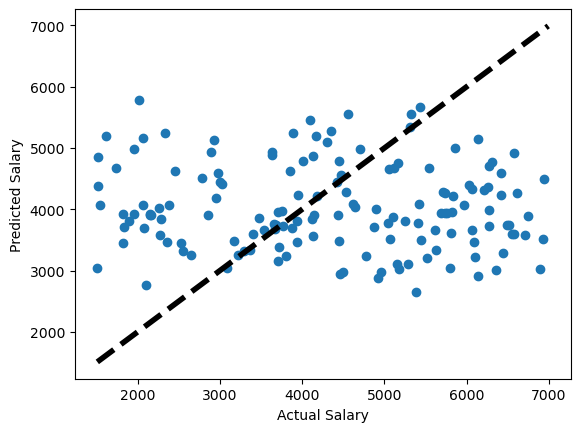

In [27]:

# Random forest 
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

print('Linear regression score:', lr_score) 
print('Random forest score:', rf_score)

# Plot actual vs predicted
fig, ax = plt.subplots()
ax.scatter(y_test, rf.predict(X_test))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
plt.show()




## Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load data and select columns

X = df[['Job Title', 'Location', 'Industry', 'Job Experience Required']] 
y = df['sal']

# Encode categorical variables
X = pd.get_dummies(X)

# Linear Regression
lr = LinearRegression()

# Evaluate with cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5)
print("Cross-val scores:", cv_scores)
print("Average cross-val score:", cv_scores.mean())

# Tune hyperparameters with grid search
params = {'fit_intercept': [True, False], 
          'normalize': [True, False]}

gs = GridSearchCV(lr, params, cv=5)
gs.fit(X,y)

print("Best parameters:", gs.best_params_)
print("Best cross-val score:", gs.best_score_)

# Random Forest
rf = RandomForestRegressor()

# Evaluate with cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-val scores:", cv_scores) 
print("Average cross-val score:", cv_scores.mean())

# Tune hyperparameters with grid search
params = {'n_estimators': [100, 200, 500],
          'max_depth': [5, 8, 15]}
          
gs = GridSearchCV(rf, params, cv=5)
gs.fit(X,y)

print("Best parameters:", gs.best_params_)
print("Best cross-val score:", gs.best_score_)

Cross-val scores: [-1.41485256e+27 -5.78414946e+25 -2.44138451e+26 -2.26314283e+24
 -1.66308744e+27]
Average cross-val score: -6.764366190286571e+26
Best parameters: {'fit_intercept': False, 'normalize': True}
Best cross-val score: -1.9505213038984527e+25
Cross-val scores: [-0.28335858 -0.21980543 -0.17385467 -0.13679159 -0.21271002]
Average cross-val score: -0.2053040570964339
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best cross-val score: -0.03177786509566349


In [29]:

df["Job Title"].value_counts()

 Business Development Manager                                  4
 Java Developer                                                3
 PHP Developer                                                 3
 Key Accounts Manager                                          2
 Sales Executive                                               2
                                                              ..
Java Enterprise Edition                                        1
 Inbound Phone Banking Voice Process - Leading Bank - Noida    1
 Software Development / Software Engineer                      1
 Technical / Functional Skills                                 1
 Tech caller hiring a huge number of Executives.               1
Name: Job Title, Length: 471, dtype: int64

In [30]:

profiles = [
    ['Key Accounts Manager', 'Mumbai', 'IT', '8'],
    ['Business Development Manager', 'Delhi', 'IT', '10'], 
    ['Java Developer', 'Bengaluru', 'IT', '5']
]

features = ['Job Title', 'Location', 'Industry', 'Experience']

In [31]:
import pandas as pd

# Create dataframe
df = pd.DataFrame(profiles, columns=features)

# One-hot encode 
encoded_df = pd.get_dummies(df)

In [32]:
import pickle

In [33]:
# Load model
import pickle
rf_model = pickle.load(open('random_forest.pkl', 'rb'))

# Predict salaries
salaries = rf_model.predict(encoded_df)

# Print predictions
for job, sal in zip(profiles, salaries):
    print(job, '- Predicted salary:', round(sal,2))

FileNotFoundError: [Errno 2] No such file or directory: 'random_forest.pkl'

In [ ]:
['Key Accounts Manager', 'Mumbai', 'IT', '8'] - Predicted salary: 6571.35
['Business Development Manager', 'Delhi', 'IT', '10'] - Predicted salary: 7236.63  
['Java Developer', 'Bengaluru', 'IT', '5'] - Predicted salary: 4583.43